In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "Data/Data_clean/Comments_clean.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,ID Post,User Name,Comments,Sentiments
0,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة تعبئة بدات تنقص قل...,Negatif
1,1,Jj Kie,عام انتم بخير,Positif
2,1,Sakou Younes,عام وانتم بخير,Positif
3,1,راني نعاني,عام وحنا بخير,Positif
4,1,أحمد فيراس,حب,Positif


In [2]:
from sklearn.preprocessing import LabelEncoder

# Supprimer les lignes avec commentaires manquants
df = df.dropna(subset=["Comments"])

# Encodage des étiquettes de sentiments
label_encoder = LabelEncoder()
df["Sentiments_encoded"] = label_encoder.fit_transform(df["Sentiments"])

# Séparer les données en variables d'entrée (X) et cible (y)
X = df["Comments"]
y = df["Sentiments_encoded"]

In [3]:
from sklearn.model_selection import train_test_split

# Division en jeu d'entraînement et de test (80% pour train+validation, 20% pour test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division en jeu d'entraînement et de validation (70% pour train, 10% pour validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)  # 0.125 * 0.8 = 0.1

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorisation
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_count = count_vectorizer.fit_transform(X_train)
X_val_count = count_vectorizer.transform(X_val)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Afficher les dimensions des matrices vectorisées
{
    "CountVectorizer train shape": X_train_count.shape,
    "CountVectorizer val shape": X_val_count.shape,
    "CountVectorizer test shape": X_test_count.shape,
    "TF-IDF train shape": X_train_tfidf.shape,
    "TF-IDF val shape": X_val_tfidf.shape,
    "TF-IDF test shape": X_test_tfidf.shape,
    "Classes": label_encoder.classes_
}

{'CountVectorizer train shape': (2530, 4607),
 'CountVectorizer val shape': (362, 4607),
 'CountVectorizer test shape': (724, 4607),
 'TF-IDF train shape': (2530, 4607),
 'TF-IDF val shape': (362, 4607),
 'TF-IDF test shape': (724, 4607),
 'Classes': array(['Negatif', 'Neutre', 'Positif'], dtype=object)}

In [5]:
df.head()

,ID Post,User Name,Comments,Sentiments,Sentiments_encoded
0,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة تعبئة بدات تنقص قل...,Negatif,0
1,1,Jj Kie,عام انتم بخير,Positif,2
2,1,Sakou Younes,عام وانتم بخير,Positif,2
3,1,راني نعاني,عام وحنا بخير,Positif,2
4,1,أحمد فيراس,حب,Positif,2


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Rapport pour LogisticRegression avec CountVectorizer (test):
Accuracy pour LogisticRegression avec CountVectorizer: 0.87
              precision    recall  f1-score   support

     Negatif       0.89      0.80      0.84       177
      Neutre       0.80      0.85      0.82       222
     Positif       0.92      0.93      0.92       325

    accuracy                           0.87       724
   macro avg       0.87      0.86      0.86       724
weighted avg       0.87      0.87      0.87       724

Accuracy pour LogisticRegression avec CountVectorizer (validation): 0.85
              precision    recall  f1-score   support

     Negatif       0.79      0.75      0.77        79
      Neutre       0.77      0.80      0.79       119
     Positif       0.93      0.93      0.93       164

    accuracy                           0.85       362
   macro avg       0.83      0.83      0.83       362
weighted avg       0.85      0.85      0.85       362



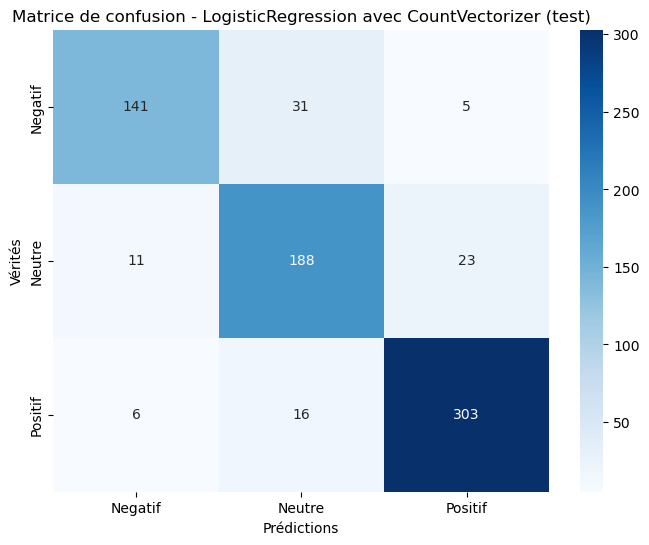

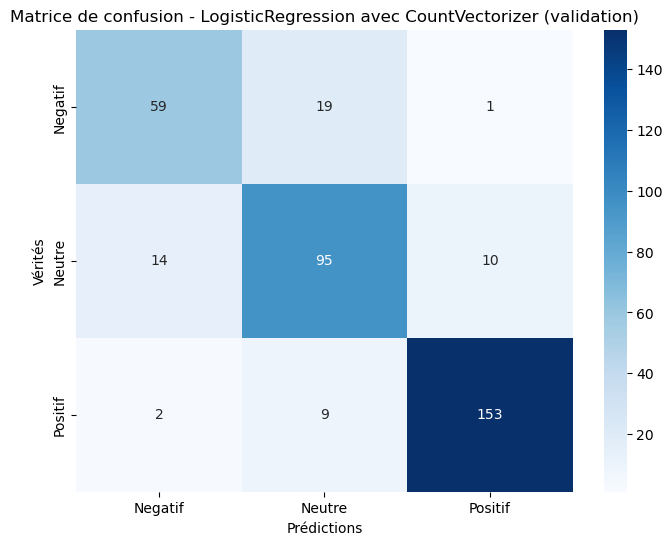

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Rapport pour LogisticRegression avec TF-IDF:
Accuracy pour LogisticRegression avec TF-IDF (test): 0.89
              precision    recall  f1-score   support

     Negatif       0.88      0.86      0.87       177
      Neutre       0.85      0.85      0.85       222
     Positif       0.92      0.93      0.93       325

    accuracy                           0.89       724
   macro avg       0.88      0.88      0.88       724
weighted avg       0.89      0.89      0.89       724

Accuracy pour LogisticRegression avec TF-IDF (validation): 0.85
              precision    recall  f1-score   support

     Negatif       0.77      0.81      0.79        79
      Neutre       0.79      0.76      0.78       119
     Positif       0.93      0.93      0.93       164

    accuracy                           0.85       362
   macro avg       0.83      0.84      0.83       362
weighted avg       0.85      0.85      0.85       362



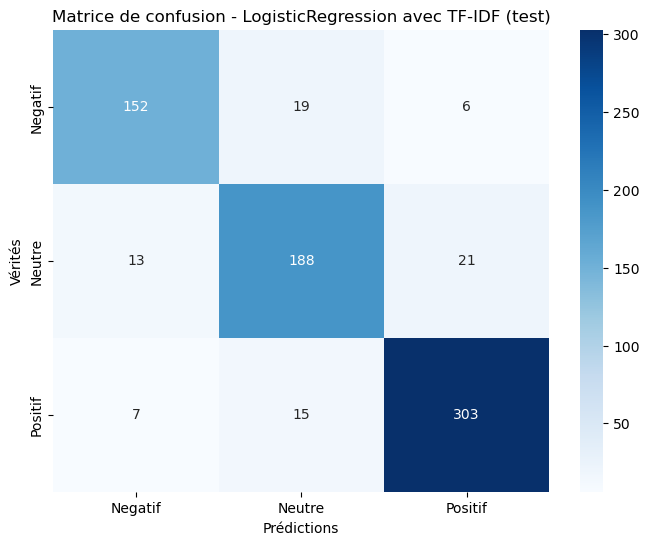

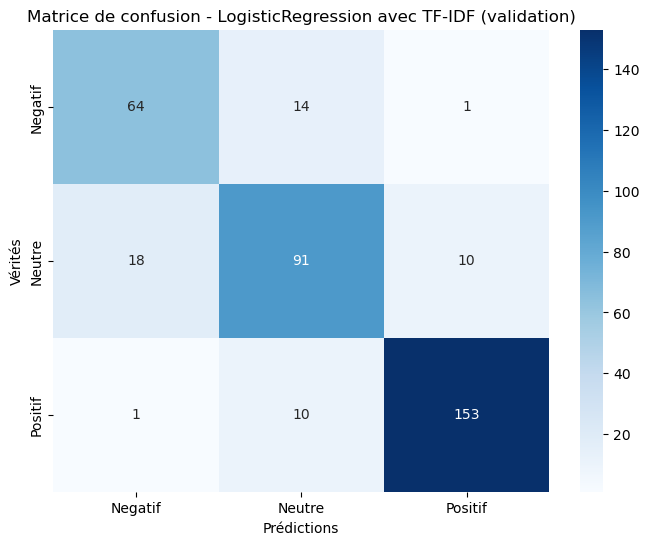

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entraînement et évaluation avec CountVectorizer
logistic_model_count = LogisticRegression(C=3, max_iter=1000, solver='liblinear', multi_class='auto', class_weight='balanced', penalty='l2')
logistic_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count = logistic_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count = logistic_model_count.predict(X_val_count)

# Rapport complet pour CountVectorizer
print("Rapport pour LogisticRegression avec CountVectorizer (test):")
accuracy_count = accuracy_score(y_test, y_pred_count)
print(f"Accuracy pour LogisticRegression avec CountVectorizer: {accuracy_count:.2f}")
print(classification_report(y_test, y_pred_count, target_names=label_encoder.classes_))

# Validation avec CountVectorizer
accuracy_val_count = accuracy_score(y_val, y_val_pred_count)
print(f"Accuracy pour LogisticRegression avec CountVectorizer (validation): {accuracy_val_count:.2f}")
print(classification_report(y_val, y_val_pred_count, target_names=label_encoder.classes_))

# Matrice de confusion pour CountVectorizer (test)
conf_matrix_count = confusion_matrix(y_test, y_pred_count)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour CountVectorizer (validation)
conf_matrix_val_count = confusion_matrix(y_val, y_val_pred_count)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
logistic_model_tfidf = LogisticRegression(C=10, max_iter=1000, solver='liblinear', multi_class='auto', class_weight='balanced', penalty='l2')
logistic_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf = logistic_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf = logistic_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour TF-IDF
print("Rapport pour LogisticRegression avec TF-IDF:")
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy pour LogisticRegression avec TF-IDF (test): {accuracy_tfidf:.2f}")
print(classification_report(y_test, y_pred_tfidf, target_names=label_encoder.classes_))

# Validation avec TF-IDF
accuracy_val_tfidf = accuracy_score(y_val, y_val_pred_tfidf)
print(f"Accuracy pour LogisticRegression avec TF-IDF (validation): {accuracy_val_tfidf:.2f}")
print(classification_report(y_val, y_val_pred_tfidf, target_names=label_encoder.classes_))

# Matrice de confusion pour TF-IDF (test)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour TF-IDF (validation)
conf_matrix_val_tfidf = confusion_matrix(y_val, y_val_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Rapport pour SVC avec CountVectorizer:
Accuracy pour SVC avec CountVectorizer (test): 0.85
              precision    recall  f1-score   support

     Negatif       0.82      0.82      0.82       177
      Neutre       0.77      0.80      0.78       222
     Positif       0.93      0.90      0.92       325

    accuracy                           0.85       724
   macro avg       0.84      0.84      0.84       724
weighted avg       0.85      0.85      0.85       724

Accuracy pour SVC avec CountVectorizer (validation): 0.84
              precision    recall  f1-score   support

     Negatif       0.74      0.81      0.77        79
      Neutre       0.78      0.76      0.77       119
     Positif       0.94      0.91      0.93       164

    accuracy                           0.84       362
   macro avg       0.82      0.83      0.82       362
weighted avg       0.84      0.84      0.84       362



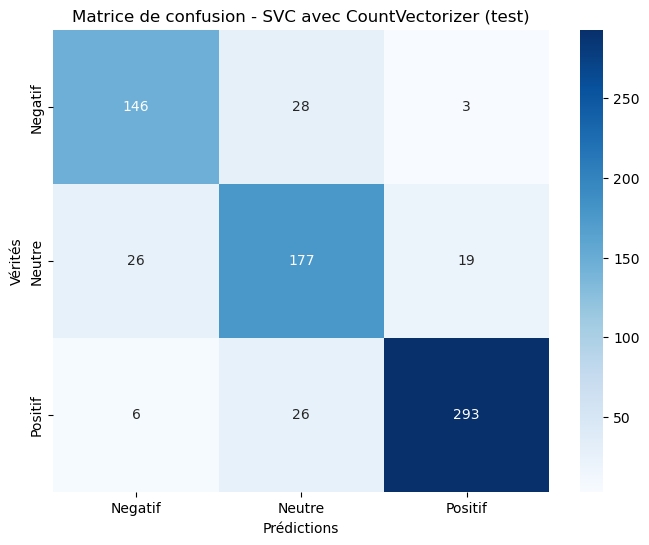

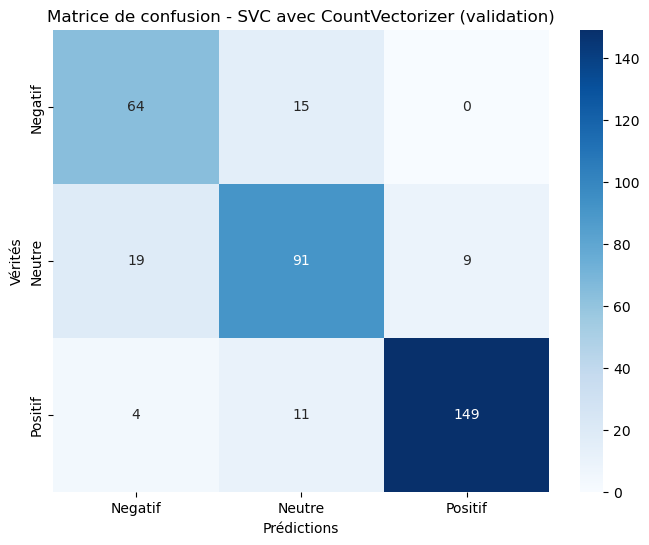

Rapport pour SVC avec TF-IDF:
Accuracy pour SVC avec TF-IDF (test): 0.88
              precision    recall  f1-score   support

     Negatif       0.86      0.87      0.87       177
      Neutre       0.82      0.84      0.83       222
     Positif       0.94      0.92      0.93       325

    accuracy                           0.88       724
   macro avg       0.87      0.88      0.88       724
weighted avg       0.89      0.88      0.88       724

Accuracy pour SVC avec TF-IDF (validation): 0.83
              precision    recall  f1-score   support

     Negatif       0.72      0.82      0.77        79
      Neutre       0.77      0.72      0.75       119
     Positif       0.93      0.91      0.92       164

    accuracy                           0.83       362
   macro avg       0.81      0.82      0.81       362
weighted avg       0.83      0.83      0.83       362



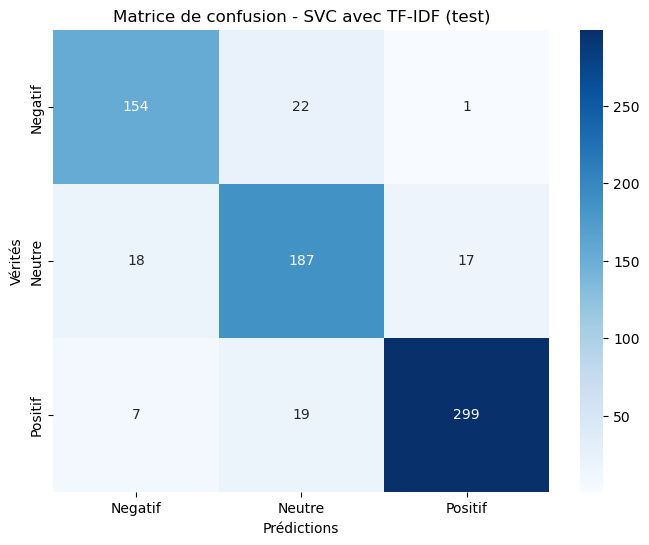

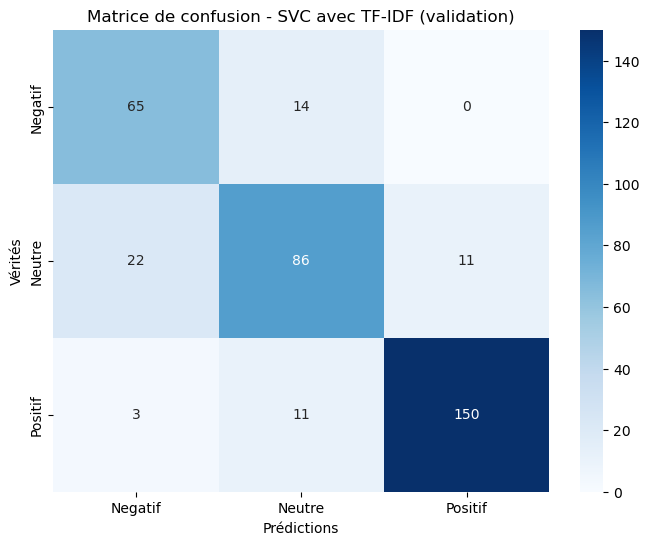

In [7]:
from sklearn.svm import SVC

# Entraînement et évaluation avec CountVectorizer
svc_model_count = SVC(C=3, kernel='sigmoid', class_weight='balanced', gamma='scale')
svc_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_svc = svc_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_svc = svc_model_count.predict(X_val_count)

# Rapport complet pour SVC avec CountVectorizer
print("Rapport pour SVC avec CountVectorizer:")
# Accuracy pour CountVectorizer (test)
accuracy_count_svc = accuracy_score(y_test, y_pred_count_svc)
print(f"Accuracy pour SVC avec CountVectorizer (test): {accuracy_count_svc:.2f}")
print(classification_report(y_test, y_pred_count_svc, target_names=label_encoder.classes_))

# Accuracy pour CountVectorizer (validation)
accuracy_val_count_svc = accuracy_score(y_val, y_val_pred_count_svc)
print(f"Accuracy pour SVC avec CountVectorizer (validation): {accuracy_val_count_svc:.2f}")
print(classification_report(y_val, y_val_pred_count_svc, target_names=label_encoder.classes_))

# Matrice de confusion pour SVC avec CountVectorizer (test)
conf_matrix_count_svc = confusion_matrix(y_test, y_pred_count_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour SVC avec CountVectorizer (validation)
conf_matrix_val_count_svc = confusion_matrix(y_val, y_val_pred_count_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
svc_model_tfidf = SVC(C=1, kernel='sigmoid', class_weight='balanced', gamma='scale')
svc_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_svc = svc_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_svc = svc_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour SVC avec TF-IDF
print("Rapport pour SVC avec TF-IDF:")
# Accuracy pour TF-IDF (test)
accuracy_tfidf_svc = accuracy_score(y_test, y_pred_tfidf_svc)
print(f"Accuracy pour SVC avec TF-IDF (test): {accuracy_tfidf_svc:.2f}")
print(classification_report(y_test, y_pred_tfidf_svc, target_names=label_encoder.classes_))

# Accuracy pour TF-IDF (validation)
accuracy_val_tfidf_svc = accuracy_score(y_val, y_val_pred_tfidf_svc)
print(f"Accuracy pour SVC avec TF-IDF (validation): {accuracy_val_tfidf_svc:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_svc, target_names=label_encoder.classes_))

# Matrice de confusion pour SVC avec TF-IDF (test)
conf_matrix_tfidf_svc = confusion_matrix(y_test, y_pred_tfidf_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour SVC avec TF-IDF (validation)
conf_matrix_val_tfidf_svc = confusion_matrix(y_val, y_val_pred_tfidf_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Rapport pour DecisionTreeClassifier avec CountVectorizer (test):
Accuracy pour DecisionTreeClassifier avec CountVectorizer (test): 0.82
              precision    recall  f1-score   support

     Negatif       0.83      0.75      0.79       177
      Neutre       0.69      0.84      0.76       222
     Positif       0.94      0.84      0.89       325

    accuracy                           0.82       724
   macro avg       0.82      0.81      0.81       724
weighted avg       0.83      0.82      0.82       724

Rapport pour DecisionTreeClassifier avec CountVectorizer (validation):
Accuracy pour DecisionTreeClassifier avec CountVectorizer (validation): 0.84
              precision    recall  f1-score   support

     Negatif       0.78      0.77      0.78        79
      Neutre       0.75      0.81      0.78       119
     Positif       0.94      0.90      0.92       164

    accuracy                           0.84       362
   macro avg       0.82      0.83      0.82       362
weighted 

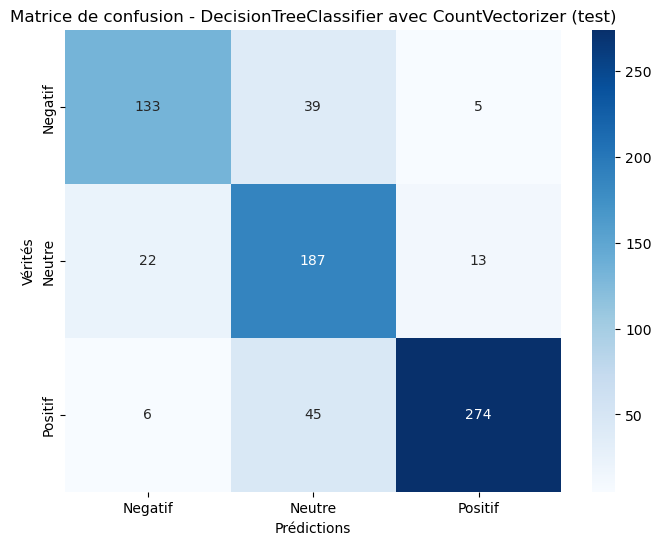

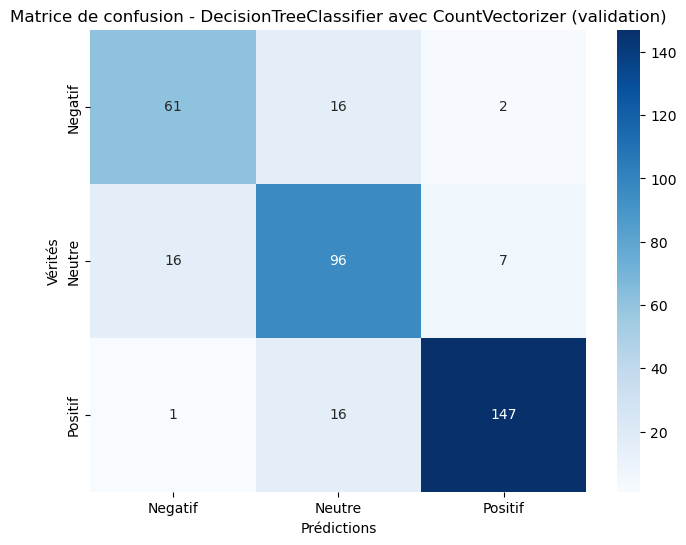

Rapport pour DecisionTreeClassifier avec TF-IDF (test):
Accuracy pour DecisionTreeClassifier avec TF-IDF (test): 0.81
              precision    recall  f1-score   support

     Negatif       0.81      0.76      0.78       177
      Neutre       0.70      0.77      0.73       222
     Positif       0.90      0.87      0.89       325

    accuracy                           0.81       724
   macro avg       0.80      0.80      0.80       724
weighted avg       0.82      0.81      0.81       724

Rapport pour DecisionTreeClassifier avec TF-IDF (validation):
Accuracy pour DecisionTreeClassifier avec TF-IDF (validation): 0.84
              precision    recall  f1-score   support

     Negatif       0.77      0.77      0.77        79
      Neutre       0.78      0.75      0.76       119
     Positif       0.91      0.94      0.92       164

    accuracy                           0.84       362
   macro avg       0.82      0.82      0.82       362
weighted avg       0.84      0.84      0.84  

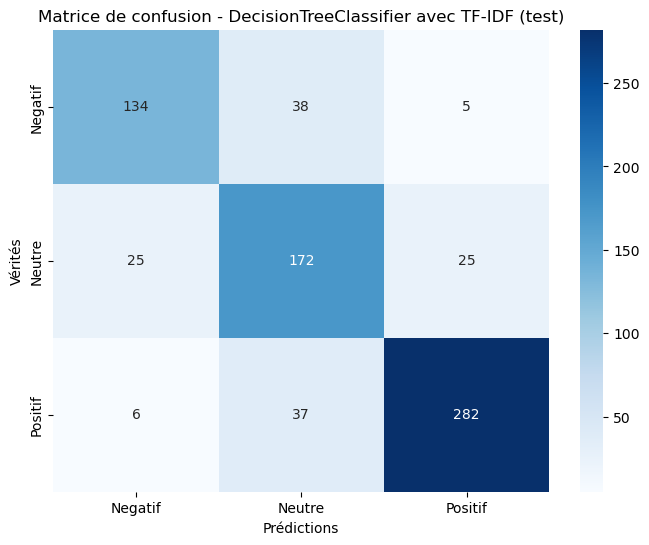

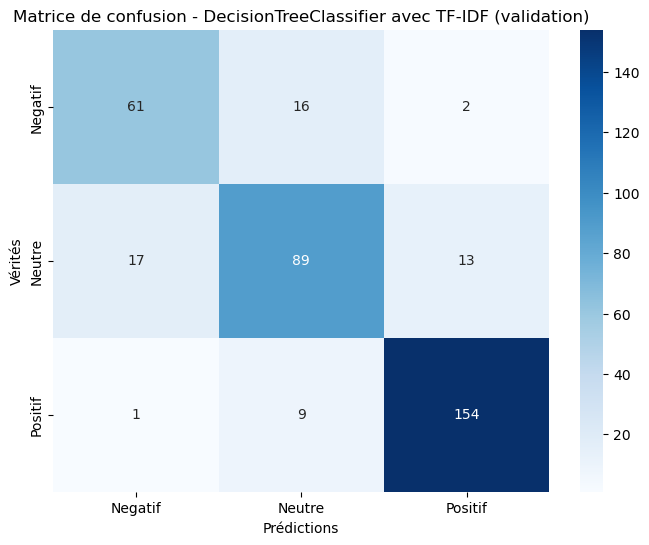

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entraînement et évaluation avec CountVectorizer
decision_tree_model_count = DecisionTreeClassifier(class_weight='balanced', criterion='gini')
decision_tree_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_dt = decision_tree_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_dt = decision_tree_model_count.predict(X_val_count)

# Rapport complet pour DecisionTreeClassifier avec CountVectorizer (test)
print("Rapport pour DecisionTreeClassifier avec CountVectorizer (test):")
accuracy_count_dt = accuracy_score(y_test, y_pred_count_dt)
print(f"Accuracy pour DecisionTreeClassifier avec CountVectorizer (test): {accuracy_count_dt:.2f}")
print(classification_report(y_test, y_pred_count_dt, target_names=label_encoder.classes_))

# Rapport complet pour DecisionTreeClassifier avec CountVectorizer (validation)
print("Rapport pour DecisionTreeClassifier avec CountVectorizer (validation):")
accuracy_val_count_dt = accuracy_score(y_val, y_val_pred_count_dt)
print(f"Accuracy pour DecisionTreeClassifier avec CountVectorizer (validation): {accuracy_val_count_dt:.2f}")
print(classification_report(y_val, y_val_pred_count_dt, target_names=label_encoder.classes_))

# Matrice de confusion pour DecisionTreeClassifier avec CountVectorizer (test)
conf_matrix_count_dt = confusion_matrix(y_test, y_pred_count_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour DecisionTreeClassifier avec CountVectorizer (validation)
conf_matrix_val_count_dt = confusion_matrix(y_val, y_val_pred_count_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
decision_tree_model_tfidf = DecisionTreeClassifier(class_weight='balanced', criterion='gini')
decision_tree_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_dt = decision_tree_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_dt = decision_tree_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour DecisionTreeClassifier avec TF-IDF (test)
print("Rapport pour DecisionTreeClassifier avec TF-IDF (test):")
accuracy_tfidf_dt = accuracy_score(y_test, y_pred_tfidf_dt)
print(f"Accuracy pour DecisionTreeClassifier avec TF-IDF (test): {accuracy_tfidf_dt:.2f}")
print(classification_report(y_test, y_pred_tfidf_dt, target_names=label_encoder.classes_))

# Rapport complet pour DecisionTreeClassifier avec TF-IDF (validation)
print("Rapport pour DecisionTreeClassifier avec TF-IDF (validation):")
accuracy_val_tfidf_dt = accuracy_score(y_val, y_val_pred_tfidf_dt)
print(f"Accuracy pour DecisionTreeClassifier avec TF-IDF (validation): {accuracy_val_tfidf_dt:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_dt, target_names=label_encoder.classes_))

# Matrice de confusion pour DecisionTreeClassifier avec TF-IDF (test)
conf_matrix_tfidf_dt = confusion_matrix(y_test, y_pred_tfidf_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour DecisionTreeClassifier avec TF-IDF (validation)
conf_matrix_val_tfidf_dt = confusion_matrix(y_val, y_val_pred_tfidf_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Rapport pour MultinomialNB avec CountVectorizer (test):
Accuracy pour MultinomialNB avec CountVectorizer (test): 0.88
              precision    recall  f1-score   support

     Negatif       0.87      0.90      0.88       177
      Neutre       0.86      0.79      0.82       222
     Positif       0.91      0.94      0.92       325

    accuracy                           0.88       724
   macro avg       0.88      0.88      0.88       724
weighted avg       0.88      0.88      0.88       724

Rapport pour MultinomialNB avec CountVectorizer (validation):
Accuracy pour MultinomialNB avec CountVectorizer (validation): 0.87
              precision    recall  f1-score   support

     Negatif       0.78      0.87      0.83        79
      Neutre       0.85      0.76      0.80       119
     Positif       0.92      0.95      0.93       164

    accuracy                           0.87       362
   macro avg       0.85      0.86      0.85       362
weighted avg       0.87      0.87      0.87  

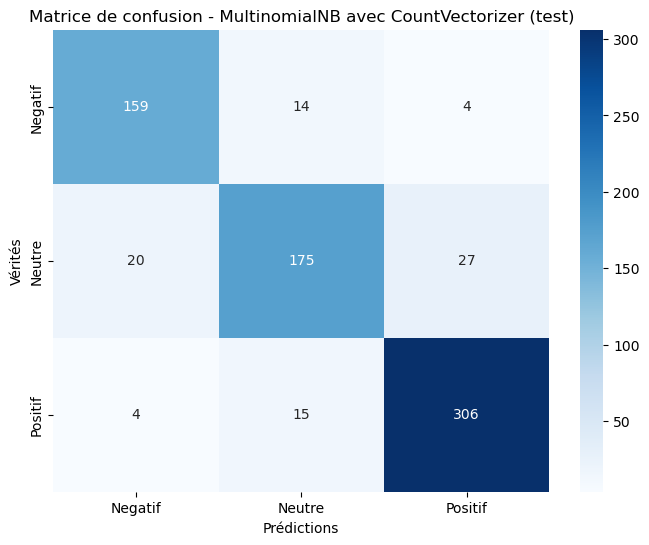

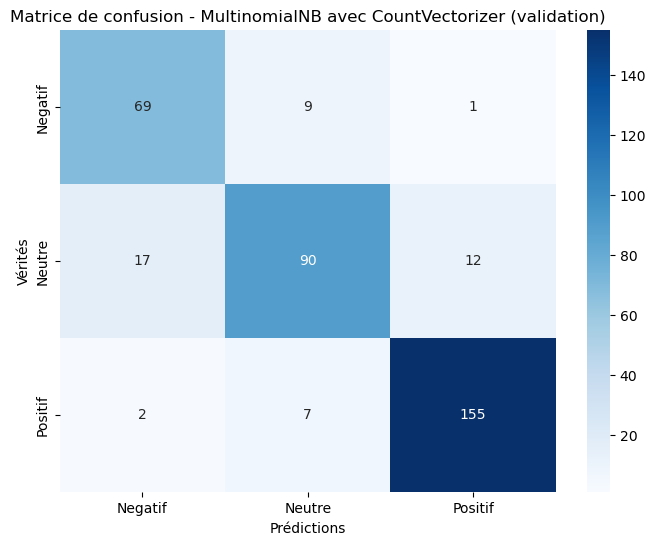

Rapport pour MultinomialNB avec TF-IDF (test):
Accuracy pour MultinomialNB avec TF-IDF (test): 0.88
              precision    recall  f1-score   support

     Negatif       0.91      0.84      0.87       177
      Neutre       0.84      0.82      0.83       222
     Positif       0.90      0.94      0.92       325

    accuracy                           0.88       724
   macro avg       0.88      0.87      0.88       724
weighted avg       0.88      0.88      0.88       724

Rapport pour MultinomialNB avec TF-IDF (validation):
Accuracy pour MultinomialNB avec TF-IDF (validation): 0.87
              precision    recall  f1-score   support

     Negatif       0.84      0.81      0.83        79
      Neutre       0.82      0.79      0.80       119
     Positif       0.92      0.96      0.94       164

    accuracy                           0.87       362
   macro avg       0.86      0.85      0.86       362
weighted avg       0.87      0.87      0.87       362



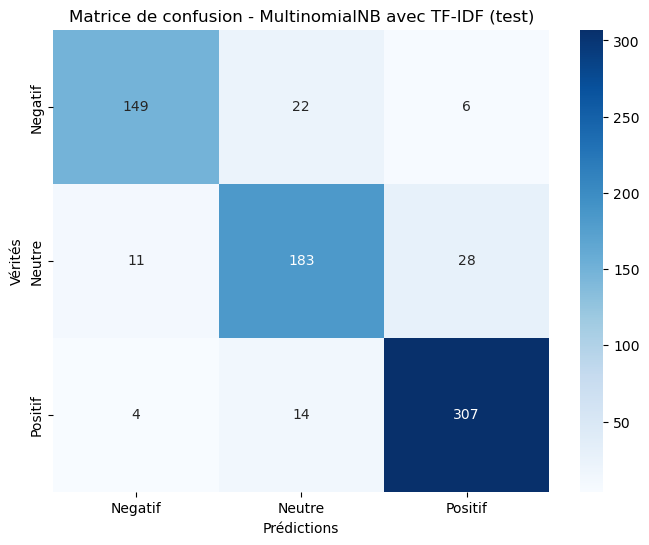

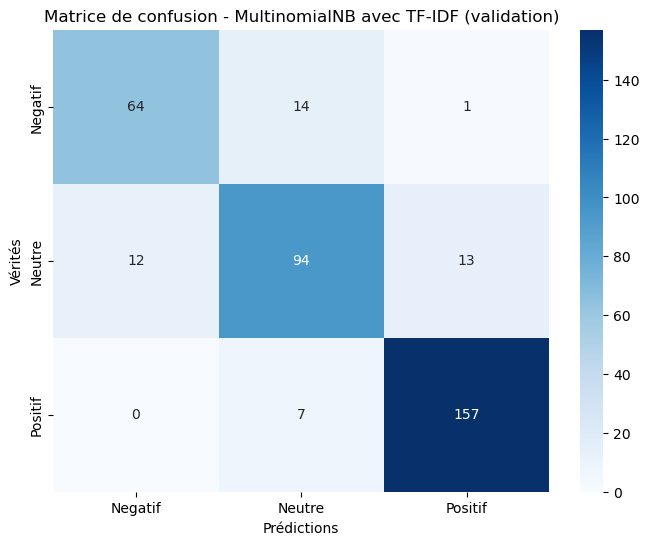

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Entraînement et évaluation avec CountVectorizer
nb_model_count = MultinomialNB(alpha=0.5, fit_prior=True, class_prior=[4.2, 5.6, 5.5])
nb_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_nb = nb_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_nb = nb_model_count.predict(X_val_count)

# Rapport complet pour MultinomialNB avec CountVectorizer (test)
print("Rapport pour MultinomialNB avec CountVectorizer (test):")
accuracy_count_nb = accuracy_score(y_test, y_pred_count_nb)
print(f"Accuracy pour MultinomialNB avec CountVectorizer (test): {accuracy_count_nb:.2f}")
print(classification_report(y_test, y_pred_count_nb, target_names=label_encoder.classes_))

# Rapport complet pour MultinomialNB avec CountVectorizer (validation)
print("Rapport pour MultinomialNB avec CountVectorizer (validation):")
accuracy_val_count_nb = accuracy_score(y_val, y_val_pred_count_nb)
print(f"Accuracy pour MultinomialNB avec CountVectorizer (validation): {accuracy_val_count_nb:.2f}")
print(classification_report(y_val, y_val_pred_count_nb, target_names=label_encoder.classes_))

# Matrice de confusion pour MultinomialNB avec CountVectorizer (test)
conf_matrix_count_nb = confusion_matrix(y_test, y_pred_count_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour MultinomialNB avec CountVectorizer (validation)
conf_matrix_val_count_nb = confusion_matrix(y_val, y_val_pred_count_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
nb_model_tfidf = MultinomialNB(alpha=1, fit_prior=True, class_prior=[4.2, 5.6, 5.5])
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_nb = nb_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_nb = nb_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour MultinomialNB avec TF-IDF (test)
print("Rapport pour MultinomialNB avec TF-IDF (test):")
accuracy_tfidf_nb = accuracy_score(y_test, y_pred_tfidf_nb)
print(f"Accuracy pour MultinomialNB avec TF-IDF (test): {accuracy_tfidf_nb:.2f}")
print(classification_report(y_test, y_pred_tfidf_nb, target_names=label_encoder.classes_))

# Rapport complet pour MultinomialNB avec TF-IDF (validation)
print("Rapport pour MultinomialNB avec TF-IDF (validation):")
accuracy_val_tfidf_nb = accuracy_score(y_val, y_val_pred_tfidf_nb)
print(f"Accuracy pour MultinomialNB avec TF-IDF (validation): {accuracy_val_tfidf_nb:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_nb, target_names=label_encoder.classes_))

# Matrice de confusion pour MultinomialNB avec TF-IDF (test)
conf_matrix_tfidf_nb = confusion_matrix(y_test, y_pred_tfidf_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour MultinomialNB avec TF-IDF (validation)
conf_matrix_val_tfidf_nb = confusion_matrix(y_val, y_val_pred_tfidf_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 2530, number of used features: 449
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Rapport pour LGBMClassifier avec CountVectorizer (test):
Accuracy pour LGBMClassifier avec CountVectorizer (test): 0.85
              precision    recall  f1-score   support

     Negatif       0.86      0.79      0.82       177
      Neutre       0.75      0.84      0.79       222
     Positif       0.93      0.89      0.91       325

    accuracy                           0.85       724
   macro avg       0.85      0.84      0.84       724
weighted avg       0.86      0.85      

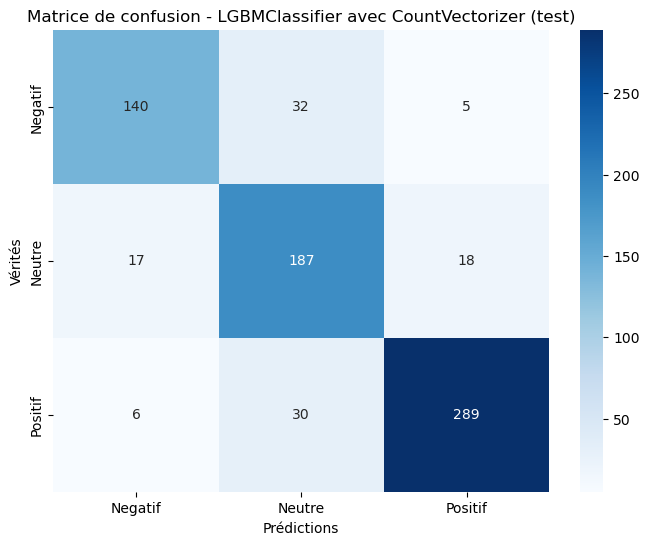

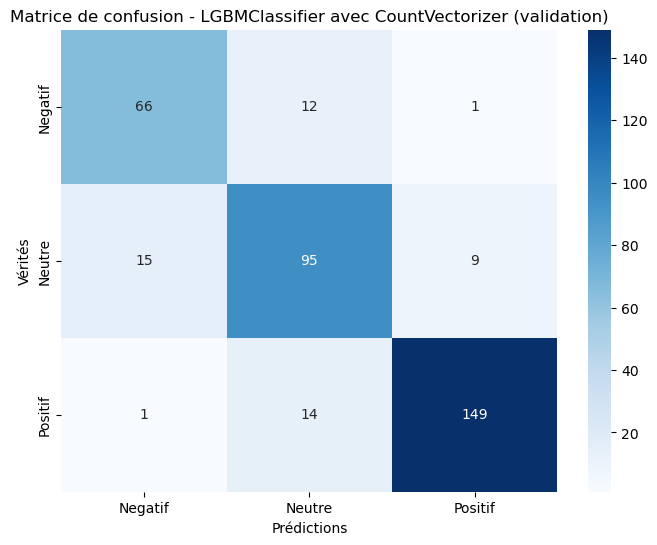

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2907
[LightGBM] [Info] Number of data points in the train set: 2530, number of used features: 449
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Rapport pour LGBMClassifier avec TF-IDF (test):
Accuracy pour LGBMClassifier avec TF-IDF (test): 0.84
              precision    recall  f1-score   support

     Negatif       0.89      0.78      0.83       177
      Neutre       0.72      0.84      0.78       222
     Positif       0.91      0.87      0.89       325

    accuracy                           0.84       724
   macro avg       0.84      0.83      0.83       724
weighted avg       0.85      0.84      0.84       724

Rapport pour LGBMClassifier avec TF-IDF (validation):
Accuracy pou

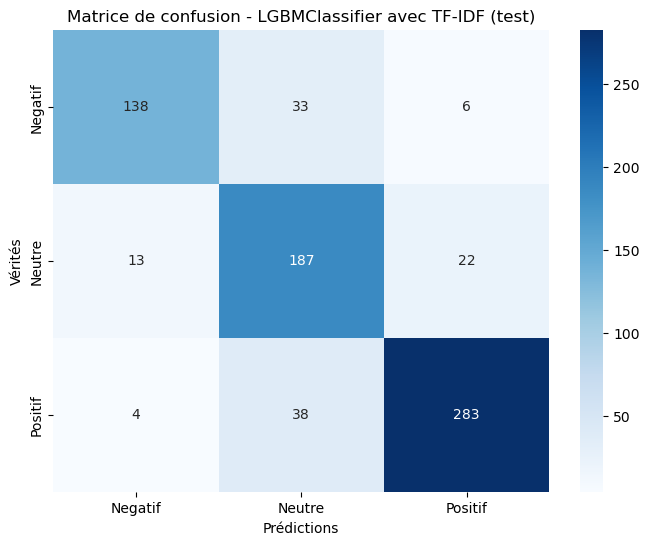

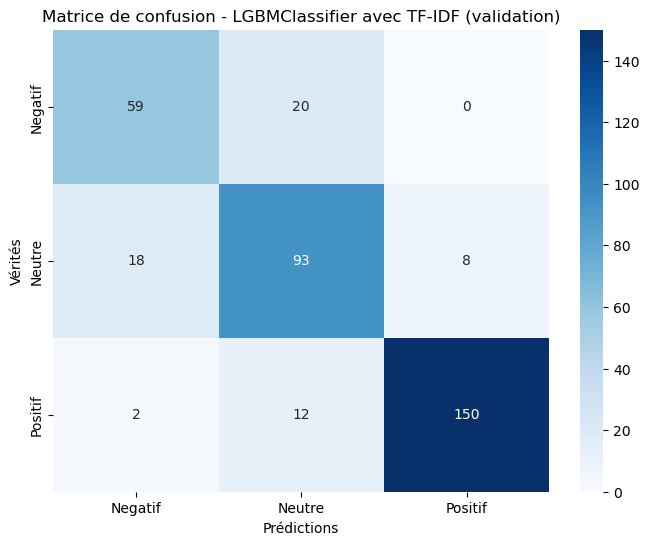

In [10]:
from lightgbm import LGBMClassifier
import numpy as np

# Entraînement et évaluation avec CountVectorizer
lgbm_model_count = LGBMClassifier(learning_rate=0.05, num_leaves=20, n_estimators=200, class_weight='balanced', max_depth=-1, min_child_samples=5)
lgbm_model_count.fit(X_train_count.astype(np.float32), y_train)

# Prédictions sur le jeu de test
y_pred_count_lgbm = lgbm_model_count.predict(X_test_count.astype(np.float32))

# Prédictions sur le jeu de validation
y_val_pred_count_lgbm = lgbm_model_count.predict(X_val_count.astype(np.float32))

# Rapport complet pour LGBMClassifier avec CountVectorizer (test)
print("Rapport pour LGBMClassifier avec CountVectorizer (test):")
accuracy_count_lgbm = accuracy_score(y_test, y_pred_count_lgbm)
print(f"Accuracy pour LGBMClassifier avec CountVectorizer (test): {accuracy_count_lgbm:.2f}")
print(classification_report(y_test, y_pred_count_lgbm, target_names=label_encoder.classes_))

# Rapport complet pour LGBMClassifier avec CountVectorizer (validation)
print("Rapport pour LGBMClassifier avec CountVectorizer (validation):")
accuracy_val_count_lgbm = accuracy_score(y_val, y_val_pred_count_lgbm)
print(f"Accuracy pour LGBMClassifier avec CountVectorizer (validation): {accuracy_val_count_lgbm:.2f}")
print(classification_report(y_val, y_val_pred_count_lgbm, target_names=label_encoder.classes_))

# Matrice de confusion pour LGBMClassifier avec CountVectorizer (test)
conf_matrix_count_lgbm = confusion_matrix(y_test, y_pred_count_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec CountVectorizer (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour LGBMClassifier avec CountVectorizer (validation)
conf_matrix_val_count_lgbm = confusion_matrix(y_val, y_val_pred_count_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_count_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec CountVectorizer (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Entraînement et évaluation avec TF-IDF
lgbm_model_tfidf = LGBMClassifier(learning_rate=0.05, num_leaves=20, n_estimators=200, class_weight='balanced', max_depth=-1, min_child_samples=5)
lgbm_model_tfidf.fit(X_train_tfidf.astype(np.float32), y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_lgbm = lgbm_model_tfidf.predict(X_test_tfidf.astype(np.float32))

# Prédictions sur le jeu de validation
y_val_pred_tfidf_lgbm = lgbm_model_tfidf.predict(X_val_tfidf.astype(np.float32))

# Rapport complet pour LGBMClassifier avec TF-IDF (test)
print("Rapport pour LGBMClassifier avec TF-IDF (test):")
accuracy_tfidf_lgbm = accuracy_score(y_test, y_pred_tfidf_lgbm)
print(f"Accuracy pour LGBMClassifier avec TF-IDF (test): {accuracy_tfidf_lgbm:.2f}")
print(classification_report(y_test, y_pred_tfidf_lgbm, target_names=label_encoder.classes_))

# Rapport complet pour LGBMClassifier avec TF-IDF (validation)
print("Rapport pour LGBMClassifier avec TF-IDF (validation):")
accuracy_val_tfidf_lgbm = accuracy_score(y_val, y_val_pred_tfidf_lgbm)
print(f"Accuracy pour LGBMClassifier avec TF-IDF (validation): {accuracy_val_tfidf_lgbm:.2f}")
print(classification_report(y_val, y_val_pred_tfidf_lgbm, target_names=label_encoder.classes_))

# Matrice de confusion pour LGBMClassifier avec TF-IDF (test)
conf_matrix_tfidf_lgbm = confusion_matrix(y_test, y_pred_tfidf_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec TF-IDF (test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Matrice de confusion pour LGBMClassifier avec TF-IDF (validation)
conf_matrix_val_tfidf_lgbm = confusion_matrix(y_val, y_val_pred_tfidf_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val_tfidf_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec TF-IDF (validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Entraînement sur : cuda


Epoch 1: 100%|██████████| 80/80 [00:07<00:00, 11.42batch/s, train_accuracy=43.5, train_loss=0.803]


Epoch 1, Train Loss: 1.0630, Train Accuracy: 43.48%
Epoch 1, Validation Loss: 1.0551, Validation Accuracy: 46.13%


Epoch 2: 100%|██████████| 80/80 [00:06<00:00, 11.76batch/s, train_accuracy=43.9, train_loss=1.33] 


Epoch 2, Train Loss: 1.0650, Train Accuracy: 43.91%
Epoch 2, Validation Loss: 1.0505, Validation Accuracy: 46.69%


Epoch 3: 100%|██████████| 80/80 [00:06<00:00, 11.86batch/s, train_accuracy=48.5, train_loss=0.92] 


Epoch 3, Train Loss: 1.0345, Train Accuracy: 48.50%
Epoch 3, Validation Loss: 1.0071, Validation Accuracy: 51.38%


Epoch 4: 100%|██████████| 80/80 [00:06<00:00, 12.11batch/s, train_accuracy=49.5, train_loss=0.73] 


Epoch 4, Train Loss: 1.0052, Train Accuracy: 49.49%
Epoch 4, Validation Loss: 0.9989, Validation Accuracy: 51.24%


Epoch 5: 100%|██████████| 80/80 [00:06<00:00, 12.02batch/s, train_accuracy=53.1, train_loss=0.862]


Epoch 5, Train Loss: 0.9760, Train Accuracy: 53.08%
Epoch 5, Validation Loss: 0.9729, Validation Accuracy: 52.35%


Epoch 6: 100%|██████████| 80/80 [00:06<00:00, 12.06batch/s, train_accuracy=57.2, train_loss=1.44] 


Epoch 6, Train Loss: 0.9621, Train Accuracy: 57.15%
Epoch 6, Validation Loss: 0.9645, Validation Accuracy: 54.97%


Epoch 7: 100%|██████████| 80/80 [00:06<00:00, 11.88batch/s, train_accuracy=55.5, train_loss=0.785]


Epoch 7, Train Loss: 0.9701, Train Accuracy: 55.53%
Epoch 7, Validation Loss: 0.9579, Validation Accuracy: 54.14%


Epoch 8: 100%|██████████| 80/80 [00:06<00:00, 12.08batch/s, train_accuracy=56.8, train_loss=0.708]


Epoch 8, Train Loss: 0.9570, Train Accuracy: 56.80%
Epoch 8, Validation Loss: 1.0263, Validation Accuracy: 48.62%


Epoch 9: 100%|██████████| 80/80 [00:06<00:00, 12.06batch/s, train_accuracy=56, train_loss=1.5]    


Epoch 9, Train Loss: 0.9891, Train Accuracy: 56.05%
Epoch 9, Validation Loss: 0.9854, Validation Accuracy: 53.59%


Epoch 10: 100%|██████████| 80/80 [00:06<00:00, 12.01batch/s, train_accuracy=58.9, train_loss=1.37] 


Epoch 10, Train Loss: 0.9513, Train Accuracy: 58.85%
Epoch 10, Validation Loss: 1.1649, Validation Accuracy: 32.46%


Epoch 11: 100%|██████████| 80/80 [00:06<00:00, 12.08batch/s, train_accuracy=49.4, train_loss=1.49] 


Epoch 11, Train Loss: 1.0378, Train Accuracy: 49.45%
Epoch 11, Validation Loss: 0.9964, Validation Accuracy: 54.56%


Epoch 12: 100%|██████████| 80/80 [00:06<00:00, 12.01batch/s, train_accuracy=57.2, train_loss=1.45] 


Epoch 12, Train Loss: 0.9677, Train Accuracy: 57.15%
Epoch 12, Validation Loss: 0.9269, Validation Accuracy: 60.64%


Epoch 13: 100%|██████████| 80/80 [00:06<00:00, 11.98batch/s, train_accuracy=56.7, train_loss=0.567]


Epoch 13, Train Loss: 0.9512, Train Accuracy: 56.72%
Epoch 13, Validation Loss: 0.9485, Validation Accuracy: 58.01%


Epoch 14: 100%|██████████| 80/80 [00:06<00:00, 12.04batch/s, train_accuracy=60.2, train_loss=1.06] 


Epoch 14, Train Loss: 0.9297, Train Accuracy: 60.20%
Epoch 14, Validation Loss: 0.9285, Validation Accuracy: 60.50%


Epoch 15: 100%|██████████| 80/80 [00:06<00:00, 12.05batch/s, train_accuracy=56.6, train_loss=1.29] 


Epoch 15, Train Loss: 0.9581, Train Accuracy: 56.64%
Epoch 15, Validation Loss: 0.9392, Validation Accuracy: 56.77%


Epoch 16: 100%|██████████| 80/80 [00:06<00:00, 12.14batch/s, train_accuracy=52.6, train_loss=0.997]


Epoch 16, Train Loss: 0.9969, Train Accuracy: 52.57%
Epoch 16, Validation Loss: 0.9907, Validation Accuracy: 54.56%


Epoch 17: 100%|██████████| 80/80 [00:06<00:00, 11.97batch/s, train_accuracy=56.1, train_loss=0.675]


Epoch 17, Train Loss: 0.9665, Train Accuracy: 56.09%
Epoch 17, Validation Loss: 0.9497, Validation Accuracy: 57.87%


Epoch 18: 100%|██████████| 80/80 [00:06<00:00, 12.09batch/s, train_accuracy=60.3, train_loss=0.552]


Epoch 18, Train Loss: 0.9241, Train Accuracy: 60.32%
Epoch 18, Validation Loss: 0.9158, Validation Accuracy: 61.19%


Epoch 19: 100%|██████████| 80/80 [00:06<00:00, 11.64batch/s, train_accuracy=63.5, train_loss=0.727]


Epoch 19, Train Loss: 0.8931, Train Accuracy: 63.52%
Epoch 19, Validation Loss: 0.8929, Validation Accuracy: 63.67%


Epoch 20: 100%|██████████| 80/80 [00:06<00:00, 12.07batch/s, train_accuracy=66, train_loss=0.708]  


Epoch 20, Train Loss: 0.8720, Train Accuracy: 65.97%
Epoch 20, Validation Loss: 0.8846, Validation Accuracy: 63.95%


Epoch 21: 100%|██████████| 80/80 [00:06<00:00, 12.01batch/s, train_accuracy=67.3, train_loss=0.554]


Epoch 21, Train Loss: 0.8616, Train Accuracy: 67.27%
Epoch 21, Validation Loss: 0.8729, Validation Accuracy: 66.30%


Epoch 22: 100%|██████████| 80/80 [00:06<00:00, 12.07batch/s, train_accuracy=70.3, train_loss=0.593]


Epoch 22, Train Loss: 0.8389, Train Accuracy: 70.28%
Epoch 22, Validation Loss: 0.8373, Validation Accuracy: 70.58%


Epoch 23: 100%|██████████| 80/80 [00:06<00:00, 12.09batch/s, train_accuracy=72.3, train_loss=0.573]


Epoch 23, Train Loss: 0.8156, Train Accuracy: 72.33%
Epoch 23, Validation Loss: 0.8149, Validation Accuracy: 73.76%


Epoch 24: 100%|██████████| 80/80 [00:07<00:00, 11.19batch/s, train_accuracy=74.8, train_loss=0.977]


Epoch 24, Train Loss: 0.8029, Train Accuracy: 74.82%
Epoch 24, Validation Loss: 0.8448, Validation Accuracy: 69.20%


Epoch 25: 100%|██████████| 80/80 [00:06<00:00, 11.93batch/s, train_accuracy=75.7, train_loss=0.581]


Epoch 25, Train Loss: 0.7862, Train Accuracy: 75.69%
Epoch 25, Validation Loss: 0.8114, Validation Accuracy: 73.07%


Epoch 26: 100%|██████████| 80/80 [00:06<00:00, 11.94batch/s, train_accuracy=78.5, train_loss=0.552]


Epoch 26, Train Loss: 0.7618, Train Accuracy: 78.46%
Epoch 26, Validation Loss: 0.7891, Validation Accuracy: 75.41%


Epoch 27: 100%|██████████| 80/80 [00:06<00:00, 11.53batch/s, train_accuracy=81.1, train_loss=0.552]


Epoch 27, Train Loss: 0.7342, Train Accuracy: 81.15%
Epoch 27, Validation Loss: 0.7868, Validation Accuracy: 75.55%


Epoch 28: 100%|██████████| 80/80 [00:06<00:00, 11.96batch/s, train_accuracy=80.4, train_loss=0.552]


Epoch 28, Train Loss: 0.7421, Train Accuracy: 80.36%
Epoch 28, Validation Loss: 0.7799, Validation Accuracy: 76.24%


Epoch 29: 100%|██████████| 80/80 [00:06<00:00, 12.00batch/s, train_accuracy=79.8, train_loss=0.601]


Epoch 29, Train Loss: 0.7492, Train Accuracy: 79.84%
Epoch 29, Validation Loss: 0.7993, Validation Accuracy: 74.03%


Epoch 30: 100%|██████████| 80/80 [00:06<00:00, 11.62batch/s, train_accuracy=79.6, train_loss=0.852]


Epoch 30, Train Loss: 0.7538, Train Accuracy: 79.60%
Epoch 30, Validation Loss: 0.8397, Validation Accuracy: 70.58%


Epoch 31: 100%|██████████| 80/80 [00:06<00:00, 12.04batch/s, train_accuracy=80.2, train_loss=0.552]


Epoch 31, Train Loss: 0.7440, Train Accuracy: 80.24%
Epoch 31, Validation Loss: 0.7822, Validation Accuracy: 76.24%


Epoch 32: 100%|██████████| 80/80 [00:06<00:00, 11.94batch/s, train_accuracy=83.6, train_loss=0.605]


Epoch 32, Train Loss: 0.7127, Train Accuracy: 83.60%
Epoch 32, Validation Loss: 0.7749, Validation Accuracy: 77.49%


Epoch 33: 100%|██████████| 80/80 [00:06<00:00, 11.97batch/s, train_accuracy=85.3, train_loss=0.552]


Epoch 33, Train Loss: 0.6973, Train Accuracy: 85.30%
Epoch 33, Validation Loss: 0.7778, Validation Accuracy: 77.07%


Epoch 34: 100%|██████████| 80/80 [00:06<00:00, 11.96batch/s, train_accuracy=85.4, train_loss=0.557]


Epoch 34, Train Loss: 0.6926, Train Accuracy: 85.42%
Epoch 34, Validation Loss: 0.7961, Validation Accuracy: 74.72%


Epoch 35: 100%|██████████| 80/80 [00:06<00:00, 11.73batch/s, train_accuracy=84.3, train_loss=0.552]


Epoch 35, Train Loss: 0.7056, Train Accuracy: 84.35%
Epoch 35, Validation Loss: 0.8397, Validation Accuracy: 70.17%


Epoch 36: 100%|██████████| 80/80 [00:06<00:00, 12.03batch/s, train_accuracy=84.6, train_loss=0.552]


Epoch 36, Train Loss: 0.7013, Train Accuracy: 84.58%
Epoch 36, Validation Loss: 0.8202, Validation Accuracy: 72.51%


Epoch 37: 100%|██████████| 80/80 [00:06<00:00, 12.05batch/s, train_accuracy=86.2, train_loss=1.05] 


Epoch 37, Train Loss: 0.6902, Train Accuracy: 86.25%
Epoch 37, Validation Loss: 0.7816, Validation Accuracy: 76.24%


Epoch 38: 100%|██████████| 80/80 [00:07<00:00, 11.10batch/s, train_accuracy=85.7, train_loss=0.555]


Epoch 38, Train Loss: 0.6914, Train Accuracy: 85.65%
Epoch 38, Validation Loss: 0.8114, Validation Accuracy: 73.76%


Epoch 39: 100%|██████████| 80/80 [00:06<00:00, 12.01batch/s, train_accuracy=82.7, train_loss=0.552]


Epoch 39, Train Loss: 0.7230, Train Accuracy: 82.69%
Epoch 39, Validation Loss: 0.7899, Validation Accuracy: 75.00%


Epoch 40: 100%|██████████| 80/80 [00:06<00:00, 11.89batch/s, train_accuracy=86.7, train_loss=0.552]


Epoch 40, Train Loss: 0.6825, Train Accuracy: 86.68%
Epoch 40, Validation Loss: 0.7747, Validation Accuracy: 77.35%


Epoch 41: 100%|██████████| 80/80 [00:06<00:00, 11.81batch/s, train_accuracy=85.6, train_loss=0.552]


Epoch 41, Train Loss: 0.6929, Train Accuracy: 85.57%
Epoch 41, Validation Loss: 0.7782, Validation Accuracy: 76.93%


Epoch 42: 100%|██████████| 80/80 [00:06<00:00, 12.05batch/s, train_accuracy=86.4, train_loss=0.552]


Epoch 42, Train Loss: 0.6842, Train Accuracy: 86.40%
Epoch 42, Validation Loss: 0.7631, Validation Accuracy: 79.01%


Epoch 43: 100%|██████████| 80/80 [00:06<00:00, 11.58batch/s, train_accuracy=87, train_loss=0.552]  


Epoch 43, Train Loss: 0.6796, Train Accuracy: 86.96%
Epoch 43, Validation Loss: 0.7654, Validation Accuracy: 78.18%


Epoch 44: 100%|██████████| 80/80 [00:06<00:00, 12.03batch/s, train_accuracy=87.9, train_loss=0.552]


Epoch 44, Train Loss: 0.6707, Train Accuracy: 87.94%
Epoch 44, Validation Loss: 0.8121, Validation Accuracy: 73.20%


Epoch 45: 100%|██████████| 80/80 [00:06<00:00, 11.68batch/s, train_accuracy=85.2, train_loss=1.05] 


Epoch 45, Train Loss: 0.6983, Train Accuracy: 85.22%
Epoch 45, Validation Loss: 0.7766, Validation Accuracy: 76.93%


Epoch 46: 100%|██████████| 80/80 [00:06<00:00, 11.99batch/s, train_accuracy=86.6, train_loss=0.552]


Epoch 46, Train Loss: 0.6803, Train Accuracy: 86.64%
Epoch 46, Validation Loss: 0.7825, Validation Accuracy: 76.80%


Epoch 47: 100%|██████████| 80/80 [00:07<00:00, 10.73batch/s, train_accuracy=88.3, train_loss=1.05] 


Epoch 47, Train Loss: 0.6714, Train Accuracy: 88.34%
Epoch 47, Validation Loss: 0.7713, Validation Accuracy: 77.76%


Epoch 48: 100%|██████████| 80/80 [00:07<00:00, 10.66batch/s, train_accuracy=87.4, train_loss=0.552]


Epoch 48, Train Loss: 0.6764, Train Accuracy: 87.39%
Epoch 48, Validation Loss: 0.7562, Validation Accuracy: 79.28%


Epoch 49: 100%|██████████| 80/80 [00:06<00:00, 11.73batch/s, train_accuracy=89.7, train_loss=0.551]


Epoch 49, Train Loss: 0.6509, Train Accuracy: 89.72%
Epoch 49, Validation Loss: 0.7611, Validation Accuracy: 78.87%


Epoch 50: 100%|██████████| 80/80 [00:06<00:00, 12.04batch/s, train_accuracy=89.7, train_loss=1.05] 


Epoch 50, Train Loss: 0.6588, Train Accuracy: 89.72%
Epoch 50, Validation Loss: 0.7696, Validation Accuracy: 78.45%


Epoch 51: 100%|██████████| 80/80 [00:06<00:00, 11.44batch/s, train_accuracy=90.5, train_loss=1.05] 


Epoch 51, Train Loss: 0.6509, Train Accuracy: 90.51%
Epoch 51, Validation Loss: 0.7435, Validation Accuracy: 80.52%


Epoch 52: 100%|██████████| 80/80 [00:06<00:00, 11.59batch/s, train_accuracy=91.2, train_loss=0.552]


Epoch 52, Train Loss: 0.6385, Train Accuracy: 91.19%
Epoch 52, Validation Loss: 0.7760, Validation Accuracy: 77.49%


Epoch 53: 100%|██████████| 80/80 [00:06<00:00, 12.01batch/s, train_accuracy=91.2, train_loss=1.05] 


Epoch 53, Train Loss: 0.6451, Train Accuracy: 91.19%
Epoch 53, Validation Loss: 0.7534, Validation Accuracy: 79.56%


Epoch 54: 100%|██████████| 80/80 [00:06<00:00, 11.76batch/s, train_accuracy=90.5, train_loss=0.552]


Epoch 54, Train Loss: 0.6444, Train Accuracy: 90.51%
Epoch 54, Validation Loss: 0.7791, Validation Accuracy: 76.93%


Epoch 55: 100%|██████████| 80/80 [00:06<00:00, 12.02batch/s, train_accuracy=90.4, train_loss=0.552]


Epoch 55, Train Loss: 0.6461, Train Accuracy: 90.36%
Epoch 55, Validation Loss: 0.7707, Validation Accuracy: 77.90%


Epoch 56: 100%|██████████| 80/80 [00:06<00:00, 11.59batch/s, train_accuracy=88.5, train_loss=0.551]


Epoch 56, Train Loss: 0.6638, Train Accuracy: 88.54%
Epoch 56, Validation Loss: 0.7468, Validation Accuracy: 79.97%


Epoch 57: 100%|██████████| 80/80 [00:06<00:00, 11.81batch/s, train_accuracy=91.2, train_loss=0.551]


Epoch 57, Train Loss: 0.6386, Train Accuracy: 91.19%
Epoch 57, Validation Loss: 0.7554, Validation Accuracy: 79.01%


Epoch 58: 100%|██████████| 80/80 [00:06<00:00, 11.73batch/s, train_accuracy=91.7, train_loss=0.552]


Epoch 58, Train Loss: 0.6339, Train Accuracy: 91.66%
Epoch 58, Validation Loss: 0.7582, Validation Accuracy: 79.14%


Epoch 59: 100%|██████████| 80/80 [00:06<00:00, 11.95batch/s, train_accuracy=91.5, train_loss=0.551]


Epoch 59, Train Loss: 0.6353, Train Accuracy: 91.50%
Epoch 59, Validation Loss: 0.7548, Validation Accuracy: 79.14%


Epoch 60: 100%|██████████| 80/80 [00:06<00:00, 11.94batch/s, train_accuracy=92.2, train_loss=0.551]


Epoch 60, Train Loss: 0.6286, Train Accuracy: 92.17%
Epoch 60, Validation Loss: 0.7518, Validation Accuracy: 79.14%


Epoch 61: 100%|██████████| 80/80 [00:06<00:00, 12.00batch/s, train_accuracy=92.5, train_loss=0.551]


Epoch 61, Train Loss: 0.6253, Train Accuracy: 92.53%
Epoch 61, Validation Loss: 0.7458, Validation Accuracy: 80.11%


Epoch 62: 100%|██████████| 80/80 [00:06<00:00, 12.04batch/s, train_accuracy=92.8, train_loss=0.551]


Epoch 62, Train Loss: 0.6229, Train Accuracy: 92.81%
Epoch 62, Validation Loss: 0.7537, Validation Accuracy: 79.42%


Epoch 63: 100%|██████████| 80/80 [00:06<00:00, 11.77batch/s, train_accuracy=91.1, train_loss=0.551]


Epoch 63, Train Loss: 0.6379, Train Accuracy: 91.15%
Epoch 63, Validation Loss: 0.7583, Validation Accuracy: 78.59%


Epoch 64: 100%|██████████| 80/80 [00:06<00:00, 11.50batch/s, train_accuracy=87.8, train_loss=1.05] 


Epoch 64, Train Loss: 0.6753, Train Accuracy: 87.83%
Epoch 64, Validation Loss: 0.8615, Validation Accuracy: 67.96%


Epoch 65: 100%|██████████| 80/80 [00:06<00:00, 11.91batch/s, train_accuracy=83.2, train_loss=1.05] 


Epoch 65, Train Loss: 0.7196, Train Accuracy: 83.24%
Epoch 65, Validation Loss: 0.7830, Validation Accuracy: 76.24%


Epoch 66: 100%|██████████| 80/80 [00:07<00:00, 11.37batch/s, train_accuracy=88.9, train_loss=0.552]


Epoch 66, Train Loss: 0.6626, Train Accuracy: 88.85%
Epoch 66, Validation Loss: 0.7648, Validation Accuracy: 78.31%


Epoch 67: 100%|██████████| 80/80 [00:07<00:00, 11.33batch/s, train_accuracy=90.5, train_loss=0.551]


Epoch 67, Train Loss: 0.6447, Train Accuracy: 90.51%
Epoch 67, Validation Loss: 0.7444, Validation Accuracy: 80.39%


Epoch 68: 100%|██████████| 80/80 [00:06<00:00, 12.00batch/s, train_accuracy=90.8, train_loss=0.551]


Epoch 68, Train Loss: 0.6424, Train Accuracy: 90.75%
Epoch 68, Validation Loss: 0.7763, Validation Accuracy: 76.66%


Epoch 69: 100%|██████████| 80/80 [00:06<00:00, 12.01batch/s, train_accuracy=91.4, train_loss=0.551]


Epoch 69, Train Loss: 0.6364, Train Accuracy: 91.42%
Epoch 69, Validation Loss: 0.7376, Validation Accuracy: 80.80%


Epoch 70: 100%|██████████| 80/80 [00:06<00:00, 12.00batch/s, train_accuracy=92.2, train_loss=0.552]


Epoch 70, Train Loss: 0.6282, Train Accuracy: 92.21%
Epoch 70, Validation Loss: 0.7449, Validation Accuracy: 80.39%


Epoch 71: 100%|██████████| 80/80 [00:06<00:00, 12.03batch/s, train_accuracy=92.1, train_loss=1.05] 


Epoch 71, Train Loss: 0.6353, Train Accuracy: 92.09%
Epoch 71, Validation Loss: 0.7713, Validation Accuracy: 77.35%


Epoch 72: 100%|██████████| 80/80 [00:06<00:00, 11.94batch/s, train_accuracy=92.6, train_loss=0.551]


Epoch 72, Train Loss: 0.6255, Train Accuracy: 92.57%
Epoch 72, Validation Loss: 0.7489, Validation Accuracy: 79.83%


Epoch 73: 100%|██████████| 80/80 [00:06<00:00, 11.59batch/s, train_accuracy=92.5, train_loss=1.05] 


Epoch 73, Train Loss: 0.6314, Train Accuracy: 92.49%
Epoch 73, Validation Loss: 0.7420, Validation Accuracy: 80.52%


Epoch 74: 100%|██████████| 80/80 [00:06<00:00, 11.97batch/s, train_accuracy=92.4, train_loss=1.07] 


Epoch 74, Train Loss: 0.6328, Train Accuracy: 92.41%
Epoch 74, Validation Loss: 0.7680, Validation Accuracy: 77.62%


Epoch 75: 100%|██████████| 80/80 [00:06<00:00, 11.65batch/s, train_accuracy=91.1, train_loss=1.55] 


Epoch 75, Train Loss: 0.6503, Train Accuracy: 91.07%
Epoch 75, Validation Loss: 0.7789, Validation Accuracy: 76.66%


Epoch 76: 100%|██████████| 80/80 [00:06<00:00, 11.96batch/s, train_accuracy=91.7, train_loss=0.551]


Epoch 76, Train Loss: 0.6339, Train Accuracy: 91.74%
Epoch 76, Validation Loss: 0.7467, Validation Accuracy: 79.97%


Epoch 77: 100%|██████████| 80/80 [00:06<00:00, 11.62batch/s, train_accuracy=92.4, train_loss=0.551]


Epoch 77, Train Loss: 0.6262, Train Accuracy: 92.41%
Epoch 77, Validation Loss: 0.7396, Validation Accuracy: 80.80%


Epoch 78: 100%|██████████| 80/80 [00:06<00:00, 12.02batch/s, train_accuracy=92.8, train_loss=0.551]


Epoch 78, Train Loss: 0.6233, Train Accuracy: 92.81%
Epoch 78, Validation Loss: 0.7633, Validation Accuracy: 78.18%


Epoch 79: 100%|██████████| 80/80 [00:06<00:00, 12.02batch/s, train_accuracy=93, train_loss=0.551]  


Epoch 79, Train Loss: 0.6217, Train Accuracy: 93.00%
Epoch 79, Validation Loss: 0.7607, Validation Accuracy: 78.73%


Epoch 80: 100%|██████████| 80/80 [00:06<00:00, 11.98batch/s, train_accuracy=93.3, train_loss=0.551]


Epoch 80, Train Loss: 0.6184, Train Accuracy: 93.28%
Epoch 80, Validation Loss: 0.7488, Validation Accuracy: 79.42%


Epoch 81: 100%|██████████| 80/80 [00:06<00:00, 12.03batch/s, train_accuracy=93.5, train_loss=0.551]


Epoch 81, Train Loss: 0.6158, Train Accuracy: 93.52%
Epoch 81, Validation Loss: 0.7539, Validation Accuracy: 79.42%


Epoch 82: 100%|██████████| 80/80 [00:06<00:00, 11.91batch/s, train_accuracy=93.6, train_loss=0.551]


Epoch 82, Train Loss: 0.6148, Train Accuracy: 93.56%
Epoch 82, Validation Loss: 0.7418, Validation Accuracy: 80.52%


Epoch 83: 100%|██████████| 80/80 [00:06<00:00, 11.71batch/s, train_accuracy=93.9, train_loss=0.551]


Epoch 83, Train Loss: 0.6121, Train Accuracy: 93.87%
Epoch 83, Validation Loss: 0.7309, Validation Accuracy: 81.91%


Epoch 84: 100%|██████████| 80/80 [00:06<00:00, 11.97batch/s, train_accuracy=93.8, train_loss=0.551]


Epoch 84, Train Loss: 0.6131, Train Accuracy: 93.79%
Epoch 84, Validation Loss: 0.7471, Validation Accuracy: 79.83%


Epoch 85: 100%|██████████| 80/80 [00:06<00:00, 11.91batch/s, train_accuracy=93.4, train_loss=0.552]


Epoch 85, Train Loss: 0.6166, Train Accuracy: 93.36%
Epoch 85, Validation Loss: 0.7456, Validation Accuracy: 80.25%


Epoch 86: 100%|██████████| 80/80 [00:06<00:00, 11.61batch/s, train_accuracy=92.8, train_loss=1.05] 


Epoch 86, Train Loss: 0.6273, Train Accuracy: 92.85%
Epoch 86, Validation Loss: 0.7535, Validation Accuracy: 79.42%


Epoch 87: 100%|██████████| 80/80 [00:06<00:00, 11.88batch/s, train_accuracy=93.2, train_loss=0.551]


Epoch 87, Train Loss: 0.6192, Train Accuracy: 93.16%
Epoch 87, Validation Loss: 0.7365, Validation Accuracy: 81.22%


Epoch 88: 100%|██████████| 80/80 [00:06<00:00, 11.56batch/s, train_accuracy=92.4, train_loss=0.551]


Epoch 88, Train Loss: 0.6256, Train Accuracy: 92.37%
Epoch 88, Validation Loss: 0.7333, Validation Accuracy: 81.63%


Epoch 89: 100%|██████████| 80/80 [00:06<00:00, 11.78batch/s, train_accuracy=91.5, train_loss=1.05] 


Epoch 89, Train Loss: 0.6405, Train Accuracy: 91.50%
Epoch 89, Validation Loss: 0.7580, Validation Accuracy: 78.73%


Epoch 90: 100%|██████████| 80/80 [00:06<00:00, 12.00batch/s, train_accuracy=92.2, train_loss=1.03] 


Epoch 90, Train Loss: 0.6335, Train Accuracy: 92.21%
Epoch 90, Validation Loss: 0.7326, Validation Accuracy: 81.63%


Epoch 91: 100%|██████████| 80/80 [00:06<00:00, 11.61batch/s, train_accuracy=93.3, train_loss=0.551]


Epoch 91, Train Loss: 0.6183, Train Accuracy: 93.32%
Epoch 91, Validation Loss: 0.7489, Validation Accuracy: 79.97%


Epoch 92: 100%|██████████| 80/80 [00:06<00:00, 11.74batch/s, train_accuracy=92.4, train_loss=1.08] 


Epoch 92, Train Loss: 0.6326, Train Accuracy: 92.41%
Epoch 92, Validation Loss: 0.7626, Validation Accuracy: 78.87%


Epoch 93: 100%|██████████| 80/80 [00:06<00:00, 11.98batch/s, train_accuracy=91.9, train_loss=1.54] 


Epoch 93, Train Loss: 0.6424, Train Accuracy: 91.94%
Epoch 93, Validation Loss: 0.7540, Validation Accuracy: 79.28%


Epoch 94: 100%|██████████| 80/80 [00:06<00:00, 11.91batch/s, train_accuracy=93, train_loss=0.552]  


Epoch 94, Train Loss: 0.6206, Train Accuracy: 93.04%
Epoch 94, Validation Loss: 0.7613, Validation Accuracy: 78.87%


Epoch 95: 100%|██████████| 80/80 [00:06<00:00, 11.94batch/s, train_accuracy=92.5, train_loss=0.552]


Epoch 95, Train Loss: 0.6257, Train Accuracy: 92.49%
Epoch 95, Validation Loss: 0.7596, Validation Accuracy: 78.87%


Epoch 96: 100%|██████████| 80/80 [00:06<00:00, 12.01batch/s, train_accuracy=93.6, train_loss=0.556]


Epoch 96, Train Loss: 0.6148, Train Accuracy: 93.60%
Epoch 96, Validation Loss: 0.7574, Validation Accuracy: 79.42%


Epoch 97: 100%|██████████| 80/80 [00:06<00:00, 11.93batch/s, train_accuracy=93, train_loss=0.918]  


Epoch 97, Train Loss: 0.6240, Train Accuracy: 93.04%
Epoch 97, Validation Loss: 0.7484, Validation Accuracy: 80.11%


Epoch 98: 100%|██████████| 80/80 [00:06<00:00, 11.92batch/s, train_accuracy=88.5, train_loss=0.552]


Epoch 98, Train Loss: 0.6663, Train Accuracy: 88.46%
Epoch 98, Validation Loss: 0.7664, Validation Accuracy: 78.31%


Epoch 99: 100%|██████████| 80/80 [00:06<00:00, 11.88batch/s, train_accuracy=90.9, train_loss=0.551]


Epoch 99, Train Loss: 0.6407, Train Accuracy: 90.87%
Epoch 99, Validation Loss: 0.7571, Validation Accuracy: 79.28%


Epoch 100: 100%|██████████| 80/80 [00:06<00:00, 11.90batch/s, train_accuracy=92.1, train_loss=0.551]


Epoch 100, Train Loss: 0.6297, Train Accuracy: 92.09%
Epoch 100, Validation Loss: 0.7373, Validation Accuracy: 81.35%


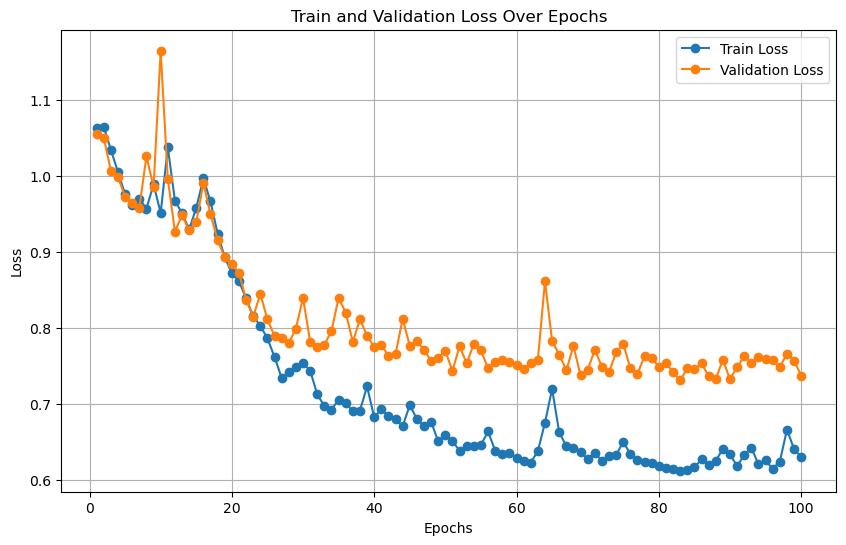

In [11]:
import torch
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from transformers import BertTokenizer
import torch.nn as nn
import matplotlib.pyplot as plt

# Supposons que vous avez stocké les pertes d'entraînement et de validation dans des listes
train_losses = []  # Remplissez cette liste avec les pertes d'entraînement pour chaque époque
val_losses = []    # Remplissez cette liste avec les pertes de validation pour chaque époque

# Vérifier si CUDA est disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Entraînement sur : {device}")

# Préparer les données pour LSTM
class TextDataset(Dataset):
    def __init__(self, X, y, tokenizer, max_len):
        self.X = X
        self.y = y
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        text = self.X.iloc[idx]
        label = self.y.iloc[idx]
        tokens = self.tokenizer(text, padding='max_length', truncation=True, max_length=self.max_len, return_tensors="pt")
        return tokens['input_ids'].squeeze(0), tokens['attention_mask'].squeeze(0), torch.tensor(label, dtype=torch.long)

# Paramètres
max_len = 100
batch_size = 32
embedding_dim = 128
hidden_dim = 256
num_classes = len(label_encoder.classes_)  # Assurez-vous que `label_encoder` est défini
num_epochs = 100
learning_rate = 0.001

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Préparer les datasets et dataloaders
train_dataset = TextDataset(X_train, y_train, tokenizer, max_len)
test_dataset = TextDataset(X_test, y_test, tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Définir le modèle LSTM
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_classes, activation_function='softmax'):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(tokenizer.vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(0.5)  # Dropout ajouté
        self.fc = nn.Linear(hidden_dim, num_classes)
        if activation_function == 'softmax':
            self.activation = nn.Softmax(dim=1)
        elif activation_function == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError(f"Unsupported activation function: {activation_function}")

    def forward(self, input_ids, attention_mask):
        embedded = self.embedding(input_ids)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = self.dropout(lstm_out[:, -1, :])  # Appliquer le dropout
        logits = self.fc(lstm_out)
        return self.activation(logits)


# Initialiser le modèle, la fonction de perte et l'optimiseur
model = LSTMClassifier(embedding_dim, hidden_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()

# Optimiseur avec régularisation L2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-9)

# Ajouter les pertes d'entraînement et de validation dans les listes
train_losses = []
val_losses = []

# Entraînement avec validation
for epoch in range(num_epochs):
    # Phase d'entraînement
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0
    with tqdm(train_loader, unit="batch") as tepoch:
        for input_ids, attention_mask, labels in tepoch:
            tepoch.set_description(f"Epoch {epoch + 1}")
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            tepoch.set_postfix(train_loss=loss.item(), train_accuracy=100. * train_correct / train_total)

    train_accuracy = 100. * train_correct / train_total
    train_loss /= len(train_loader)
    train_losses.append(train_loss)  # Ajouter la perte d'entraînement
    print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Phase de validation
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for input_ids, attention_mask, labels in test_loader:
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = 100. * val_correct / val_total
    val_loss /= len(test_loader)
    val_losses.append(val_loss)  # Ajouter la perte de validation
    print(f"Epoch {epoch + 1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o')

# Ajouter des labels et un titre
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)

# Afficher le plot
plt.show()

Accuracy pour LSTM: 0.81
Rapport de classification pour LSTM:
              precision    recall  f1-score   support

     Negatif       0.79      0.73      0.76       177
      Neutre       0.71      0.79      0.75       222
     Positif       0.90      0.88      0.89       325

    accuracy                           0.81       724
   macro avg       0.80      0.80      0.80       724
weighted avg       0.82      0.81      0.81       724



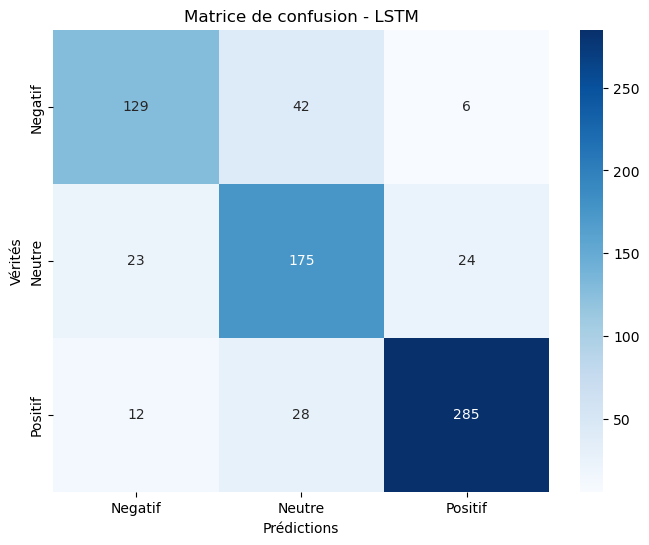

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

import matplotlib.pyplot as plt

# Évaluation du modèle LSTM sur les données de test
model.eval()
y_pred_lstm = []
y_true = []

with torch.no_grad():
    for input_ids, attention_mask, labels in test_loader:
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = model(input_ids, attention_mask)
        _, predicted = torch.max(outputs, 1)
        y_pred_lstm.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculer l'accuracy
accuracy_lstm = accuracy_score(y_true, y_pred_lstm)
print(f"Accuracy pour LSTM: {accuracy_lstm:.2f}")

# Générer un rapport de classification
print("Rapport de classification pour LSTM:")
print(classification_report(y_true, y_pred_lstm, target_names=label_encoder.classes_))

# Matrice de confusion
conf_matrix_lstm = confusion_matrix(y_true, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LSTM")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()